In [1]:
import pandas as pd

In [2]:
fact_booking_df = pd.read_csv(r"C:\code\Codebasic_Python_Download\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")
fact_booking_df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
fact_booking_df.shape

(134590, 12)

In [4]:
print(fact_booking_df["room_category"].unique())
print(fact_booking_df["booking_platform"].unique())
print(fact_booking_df["booking_status"].unique())

['RT1' 'RT2' 'RT3' 'RT4']
['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']
['Checked Out' 'Cancelled' 'No Show']


In [5]:
fact_booking_df["booking_platform"].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

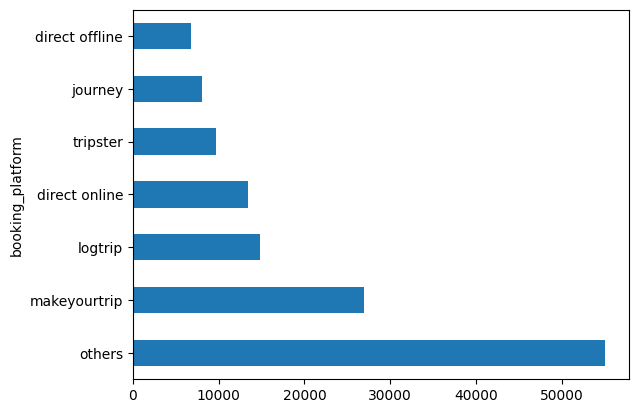

In [6]:
fact_booking_df["booking_platform"].value_counts().plot(kind="barh")

In [7]:
fact_booking_df.describe().round(2)

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.00,134587.00,56683.00,134590.00,134590.00
mean,18061.11,2.04,3.62,15378.05,12696.12
std,1093.06,1.03,1.24,93036.04,6928.11
min,16558.00,-17.00,1.00,6500.00,2600.00
25%,17558.00,1.00,3.00,9900.00,7600.00
50%,17564.00,2.00,4.00,13500.00,11700.00
75%,18563.00,2.00,5.00,18000.00,15300.00
max,19563.00,6.00,5.00,28560000.00,45220.00


In [8]:
#fact_booking_df.describe().map(lambda x: '{:.2f}'.format(x))  

In [9]:
dim_date_df = pd.read_csv(r"C:\code\Codebasic_Python_Download\source-code\3_project_hospitality_analysis\datasets\dim_date.csv")
dim_hoteles_df = pd.read_csv(r"C:\code\Codebasic_Python_Download\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv")
dim_rooms_df = pd.read_csv(r"C:\code\Codebasic_Python_Download\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv")
fact_agg_booing_df = pd.read_csv(r"C:\code\Codebasic_Python_Download\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")

In [10]:
dim_hoteles_df.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [11]:
dim_hoteles_df['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [12]:
dim_hoteles_df['city'].value_counts().sort_values(ascending=False)

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [13]:
fact_agg_booing_df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [14]:
fact_agg_booing_df.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [15]:
fact_agg_booing_df.property_id.value_counts().head(5)

property_id
16559    368
19562    368
19563    368
17558    368
16558    368
Name: count, dtype: int64

In [16]:
fact_agg_booing_df.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [17]:
fact_agg_booing_df[fact_agg_booing_df.successful_bookings>fact_agg_booing_df.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [18]:
fact_agg_booing_df[fact_agg_booing_df.capacity==fact_agg_booing_df.capacity.max()].head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0


In [19]:
#df_temp =fact_agg_booing_df[fact_agg_booing_df.capacity ==fact_agg_booing_df.capacity.max()]
#df_temp

# Data Cleaning

In [20]:
fact_booking_df.describe().round(2)

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.00,134587.00,56683.00,134590.00,134590.00
mean,18061.11,2.04,3.62,15378.05,12696.12
std,1093.06,1.03,1.24,93036.04,6928.11
min,16558.00,-17.00,1.00,6500.00,2600.00
25%,17558.00,1.00,3.00,9900.00,7600.00
50%,17564.00,2.00,4.00,13500.00,11700.00
75%,18563.00,2.00,5.00,18000.00,15300.00
max,19563.00,6.00,5.00,28560000.00,45220.00


In [21]:
fact_booking_df[fact_booking_df.no_guests<=0][['booking_id','no_guests']]

,booking_id,no_guests
0,May012216558RT11,-3.0
3,May012216558RT14,-2.0
17924,May122218559RT44,-10.0
18020,May122218561RT22,-12.0
18119,May122218562RT311,-6.0
18121,May122218562RT313,-4.0
56715,Jun082218562RT12,-17.0
119765,Jul202219560RT220,-1.0
134586,Jul312217564RT47,-4.0


In [22]:
fact_booking_df = fact_booking_df[fact_booking_df.no_guests>0]
fact_booking_df.shape

(134578, 12)

In [23]:
fact_booking_df.revenue_generated.max()

np.int64(28560000)

In [24]:
avg , std = fact_booking_df.revenue_generated.mean() , fact_booking_df.revenue_generated.std()
avg , std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [25]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [26]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [27]:
fact_booking_df[fact_booking_df.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [28]:
fact_booking_df[fact_booking_df.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [29]:
fact_booking_df = fact_booking_df[fact_booking_df.revenue_generated<higher_limit]
fact_booking_df.shape

(134573, 12)

In [30]:
fact_booking_df.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [31]:
higher_limit = 12695.983585 + 3*6927.791692
higher_limit

33479.358661

In [32]:
fact_booking_df[fact_booking_df.revenue_realized>higher_limit].shape

(1299, 12)

In [33]:
dim_rooms_df

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [34]:
fact_booking_df[fact_booking_df.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [35]:
23439.308444 + 3*9048.599076

50585.105672000005

In [36]:
fact_booking_df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [37]:
fact_agg_booing_df.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [38]:
fact_agg_booing_df[fact_agg_booing_df.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [39]:
fact_agg_booing_df.capacity.median()

np.float64(25.0)

In [40]:
fact_agg_booing_df.capacity.fillna(fact_agg_booing_df.capacity.median(),inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_19188\2600395271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fact_agg_booing_df.capacity.fillna(fact_agg_booing_df.capacity.median(),inplace=True)


In [41]:
fact_agg_booing_df.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [42]:
fact_agg_booing_df[fact_agg_booing_df['successful_bookings']>fact_agg_booing_df['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [43]:
fact_agg_booing_df.shape

(9200, 5)

In [44]:
fact_agg_booing_df = fact_agg_booing_df[fact_agg_booing_df['successful_bookings']<=fact_agg_booing_df['capacity']]
fact_agg_booing_df.shape

(9194, 5)

-----------------------------------------

# Data Transformation

In [45]:
fact_agg_booing_df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [46]:
#fact_agg_booing_df["Occup_Pct"] = fact_agg_booing_df['successful_bookings'].div(fact_agg_booing_df['capacity']).multiply(100).round(2)
fact_agg_booing_df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [47]:
fact_agg_booing_df["Occup_Pct"] = fact_agg_booing_df['successful_bookings'].div(fact_agg_booing_df['capacity'])
fact_agg_booing_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occup_Pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [48]:
fact_agg_booing_df["Occup_Pct"] = fact_agg_booing_df["Occup_Pct"].apply(lambda x :round(x*100,2))
fact_agg_booing_df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occup_Pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


# Insight Generation

Average Occupany Rate by Room Categories:-

In [49]:
fact_agg_booing_df.groupby('room_category')["Occup_Pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: Occup_Pct, dtype: float64

In [50]:
dim_rooms_df

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [51]:
df = pd.merge(fact_agg_booing_df,dim_rooms_df,left_on='room_category',right_on='room_id')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occup_Pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard


In [52]:
df.drop('room_id',axis=1,inplace=True)

In [53]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occup_Pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard


In [54]:
df.groupby('room_class')['Occup_Pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: Occup_Pct, dtype: float64

-----------------------

Print Average Rate Per City

In [55]:
dim_hoteles_df.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [56]:
df = pd.merge(fact_agg_booing_df,dim_hoteles_df,on ='property_id')
df.groupby('city')['Occup_Pct'].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: Occup_Pct, dtype: float64

----------------------------

When was the occupancy better,weekend or weekday?

In [57]:
dim_date_df.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [58]:
pd.merge(fact_agg_booing_df,dim_date_df,left_on='check_in_date',right_on='date').drop('date',axis=1).groupby('day_type')['Occup_Pct'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: Occup_Pct, dtype: float64

---------------------------------------------

In June Month What is the Occupancy of different cities

In [59]:
#fact_agg_booing_df[pd.to_datetime(fact_agg_booing_df['check_in_date'],format='%d-%b-%y').dt.month==6].head(3)

In [60]:
dim_date_df.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [61]:
df = pd.merge(df,dim_date_df,left_on='check_in_date',right_on='date')

In [62]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occup_Pct,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [63]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [64]:
df_jun_22 = df[df['mmm yy'] == 'Jun 22']
df_jun_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occup_Pct,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [65]:
df_jun_22.groupby('city')['Occup_Pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: Occup_Pct, dtype: float64

-----------------------------

Adding New Data

In [66]:
new_df = pd.read_csv(r"C:\code\Codebasic_Python_Download\source-code\3_project_hospitality_analysis\datasets\new_data_august.csv")
new_df = new_df.rename(columns={'occ%':'Occup_Pct'})
new_df.sort_index(axis=1).head(3)

,Occup_Pct,capacity,category,check_in_date,city,day_type,mmm yy,property_id,property_name,room_category,room_class,successful_bookings,week no
0,100.00,30,Luxury,01-Aug-22,Mumbai,weekeday,Aug-22,16559,Atliq Exotica,RT1,Standard,30,W 32
1,70.00,30,Luxury,01-Aug-22,Bangalore,weekeday,Aug-22,19562,Atliq Bay,RT1,Standard,21,W 32
2,76.67,30,Business,01-Aug-22,Bangalore,weekeday,Aug-22,19563,Atliq Palace,RT1,Standard,23,W 32


In [67]:
df.sort_index(axis=1).head(3)

,Occup_Pct,capacity,category,check_in_date,city,date,day_type,mmm yy,property_id,property_name,room_category,successful_bookings,week no
0,51.72,29.0,Business,10-May-22,Bangalore,10-May-22,weekeday,May 22,19563,Atliq Palace,RT3,15,W 20
1,63.33,30.0,Business,10-May-22,Hyderabad,10-May-22,weekeday,May 22,18560,Atliq City,RT1,19,W 20
2,60.00,30.0,Luxury,10-May-22,Bangalore,10-May-22,weekeday,May 22,19562,Atliq Bay,RT1,18,W 20


In [68]:
df.shape

(6497, 13)

In [69]:
new_df.shape

(7, 13)

In [70]:
latest_df = pd.concat([df,new_df],ignore_index=True,axis =0)
latest_df.drop('date',axis=1,inplace=True)
latest_df.tail(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occup_Pct,property_name,category,city,mmm yy,week no,day_type,room_class
6501,19560,01-Aug-22,RT1,20,26.0,76.92,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,Standard
6502,17561,01-Aug-22,RT1,18,26.0,69.23,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,Standard
6503,17564,01-Aug-22,RT1,10,16.0,62.50,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday,Standard


In [71]:
latest_df.shape

(6504, 13)

--------------------------------------

Print Revenue Realized Per City

In [72]:
fact_booking_df.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [73]:
dim_hoteles_df.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [74]:
df_boking_all = pd.merge(fact_booking_df,dim_hoteles_df,on = 'property_id')
df_boking_all.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

Print Month By Month Revenue

In [75]:
df_boking_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [76]:
dim_date_df.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [77]:
dim_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [78]:
dim_date_df['date'] = pd.to_datetime(dim_date_df['date'],format = '%d-%b-%y')

In [79]:
dim_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [80]:
df_boking_all['check_in_date'] = pd.to_datetime(df_boking_all['check_in_date'],dayfirst=True,errors='coerce')

In [81]:
df_boking_all = pd.merge(df_boking_all,dim_date_df,left_on='check_in_date',right_on='date')

In [82]:
df_boking_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [86]:
df_boking_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    243180932
Jun 22    229637640
May 22    234353183
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

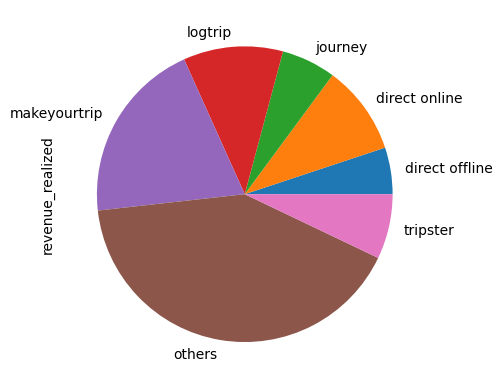

In [87]:
df_boking_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")

Average Rating Per City

In [88]:
df_boking_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.79
Hyderabad    3.65
Mumbai       3.66
Name: ratings_given, dtype: float64